## Packages

In [769]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Resources
General: 
- Hands on Machine Learning with scikit-learn and tensorflow, chapter 5, 6, 7

- Machine Learnia : https://www.youtube.com/watch?v=w_bLGK4Pteo


Decision Trees: 
- https://scikit-learn.org/stable/modules/tree.html
- https://www.lovelyanalytics.com/2016/08/16/decision-tree-comment-ca-marche/
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://www.youtube.com/watch?v=sgQAhG5Q7iY

Random Forests:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://www.youtube.com/watch?v=v6VJ2RO66Ag

SVM: 
- https://scikit-learn.org/stable/modules/svm.html
- https://towardsdatascience.com/a-brief-introduction-to-support-vector-machine-adf0f103a80f
- https://www.youtube.com/watch?v=_YPScrckx28
- https://www.youtube.com/watch?v=Q7vT0--5VII

Learning Curves: 
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
- https://towardsdatascience.com/why-you-should-be-plotting-learning-curves-in-your-next-machine-learning-project-221bae60c53

Validation Curves 
- https://scikit-learn.org/stable/modules/learning_curve.html

- Take some time to read book sections for decision tree, random forest and SVM algorithms.
- Import these algorithms from scikit-learn and find the hyperparameter options that are available when they are instantiated.


## Decision trees

Un arbre de décision, c’est un modèle supervisé qui apprend à partitionner l’espace des variables en posant une suite de questions “si/alors” pour aboutir à une prédiction.       
Avec scikit-learn, on l’emploie le plus souvent via DecisionTreeClassifier pour la classification ou DecisionTreeRegressor pour la régression.         
Le flux d’usage est direct : on prépare les données, on sépare en train/test avec train_test_split, on instancie le modèle, puis fit(X_train, y_train) pour l’entraîner et predict(X_test) pour obtenir les prédictions.       
Pour l’évaluation et l’exploration, on peut tracer l’arbre avec plot_tree (Matplotlib) ou exporter un .dot avec export_graphviz, et on s’appuie sur cross_val_score, learning_curve ou validation_curve pour comprendre son biais/variance. Quand on veut choisir automatiquement de bons réglages, GridSearchCV ou RandomizedSearchCV font l’affaire.


Ce qui “fait” un arbre, ce sont surtout ses hyperparamètres. 
 - max_depth limite la profondeur et contrôle directement la complexité (trop petit ⇒ sous-apprentissage, trop grand ⇒ surapprentissage). 
 - min_samples_split et min_samples_leaf imposent une taille minimale des sous-ensembles avant de couper, ce qui lisse l’arbre et réduit la variance. 
 - max_leaf_nodes borne le nombre de feuilles
 - max_features restreint les variables testées à chaque split (utile pour la diversité en forêt aléatoire), 
 - class_weight compense les classes déséquilibrées, 
 - random_state fige l’aléa pour la reproductibilité. 
 
 Côté critère d’impureté en classification, on choisit via criterion="gini", "entropy" ou "log_loss" ; 
 en régression, on a criterion="squared_error", "friedman_mse" ou "poisson". 
Il existe aussi l’élagage a posteriori avec ccp_alpha (Minimal Cost-Complexity Pruning) qui permet de simplifier un arbre trop profond en sacrifiant des branches peu utiles.

L’entropy et l’indice de Gini mesurent toutes deux l’impureté d’un nœud, c’est-à-dire à quel point les classes y sont mélangées. Si 𝑝𝑘
est la proportion de la classe 𝑘 dans un nœud, l’indice de Gini vaut 𝐺𝑖𝑛𝑖=1−∑𝑝𝑘²: plus il est proche de 0, plus le nœud est “pur”. 

L’entropie de Shannon est 𝐸𝑛𝑡𝑟𝑜𝑝𝑦=−∑𝑝𝑘log2𝑝𝑘 et capte la même idée avec une pénalisation un peu différente des mélanges rares.  

Lors d’une scission, l’algorithme choisit la variable et le seuil qui maximisent la réduction d’impureté (pour l’entropie on parle souvent de gain d’information). En pratique, Gini et entropie donnent souvent des arbres très similaires ; Gini est légèrement plus rapide et a tendance à favoriser la classe majoritaire, tandis que l’entropie est un peu plus “sensible” aux petites proportions. L’essentiel reste d’ajuster la complexité de l’arbre avec la profondeur, la taille minimale des feuilles et, si besoin, l’élagage, puis de valider ces choix par cross-validation.
 

In [770]:
# Load dataset
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data[:, 2:] # petal length and width
y = iris.target

In [771]:
print(X)
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [772]:
# Train a decision tree with max_depth=2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelDT=DecisionTreeClassifier(max_depth=2,random_state=42)
modelDT.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Visualization: export_graphviz

In [773]:
# Visualize decision tree using graphviz 
from sklearn.tree import export_graphviz

feature_names = [iris.feature_names[0],iris.feature_names[1]]                # ['sepal length (cm)', ...]
class_names= iris.target_names.tolist()    
feature_names

export_graphviz(
    modelDT,
    out_file=None,
    feature_names=feature_names,
    class_names=class_names,
    filled=True, rounded=True, special_characters=True
)
print("✅ Fichier 'iris_tree.dot' créé dans le dossier courant")


✅ Fichier 'iris_tree.dot' créé dans le dossier courant


PNG écrit ici: c:\Users\mvana\Documents\Formation data scientist\12. Machine Learning\ML3 - Implémentation Algo\iris_tree.png


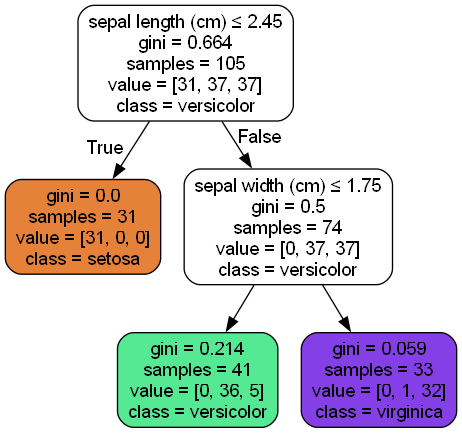

In [774]:
import subprocess, shutil, os, sys
from IPython.display import Image as IPyImage, display
# 2) Utilise le dot officiel (remplace si ton chemin diffère)
DOT = r"C:\Program Files\Graphviz\bin\dot.exe"

# 3) Génère SVG (lisible dans le notebook)
subprocess.run([DOT, "-Tpng", "iris_tree.dot", "-o", "iris_tree.png"], check=True)
print("PNG écrit ici:", os.path.join(os.getcwd(), "iris_tree.png"))
display(IPyImage(filename="iris_tree.png"))





In [775]:
import os
print('cwd:', os.getcwd()) 

cwd: c:\Users\mvana\Documents\Formation data scientist\12. Machine Learning\ML3 - Implémentation Algo


In [776]:
# open image with PIL
from pathlib import Path
from PIL import Image

p = Path(r"C:\Users\mvana\Documents\Formation data scientist\12. Machine Learning\ML3 - Implémentation Algo\iris_tree.png")
print(p.exists())  # doit être True
img = Image.open(p)
img.show()

True


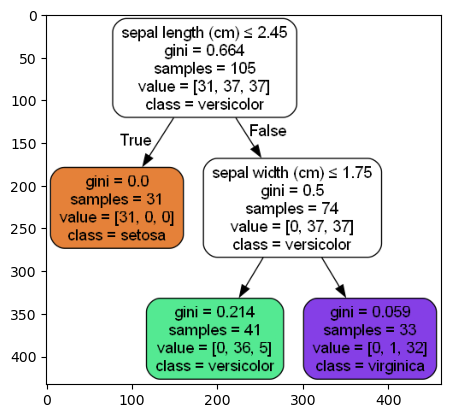

In [777]:
# open image with matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('iris_tree.png')
imgplot = plt.imshow(img)

### Visualization: plot_tree

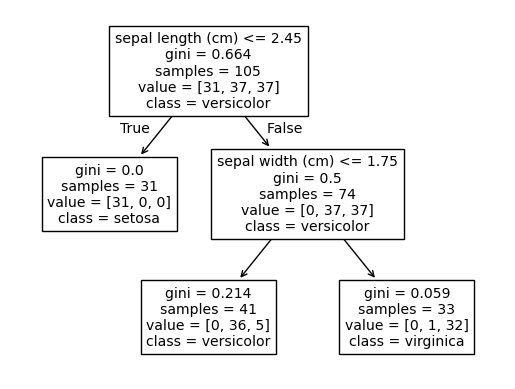

In [778]:
# visualize using the 'plot_tree' method (from the sklearn.tree module)
from sklearn.tree import plot_tree

plot = plot_tree(modelDT, feature_names = iris.feature_names[:2], class_names = iris.target_names)

Compute the predictions of a decision tree classifier on a test set and calculate all the classification metrics you know:


In [779]:
# split in train and test set ajd preditions
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_validate

y_predTestDT = modelDT.predict(X_test)
y_predTrainDT = modelDT.predict(X_train)



In [780]:
from eval_model_metrics import eval_metrics
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix
)

import numpy as np
import pandas as pd

metricsDT, cmDT_test, cmDT_train = eval_metrics(
    modelDT, X_train, y_train, X_test, y_test,
    average="weighted",
    class_names=getattr(iris, "target_names", None)  # optionnel
)

print("=== Métriques globales Decision Tree (Train vs Test) ===")
print(metricsDT.round(3))
print("\n=== Matrice de confusion Decision Tree (Test) ===")
print(cmDT_test)
print("\n=== Matrice de confusion Decision tree (Train) ===")
print(cmDT_train)


=== Métriques globales Decision Tree (Train vs Test) ===
   Split  Accuracy  Precision  Recall     F1  Support
0  Train     0.943      0.946   0.943  0.943      105
1   Test     1.000      1.000   1.000  1.000       45

=== Matrice de confusion Decision Tree (Test) ===
                 Prédit setosa  Prédit versicolor  Prédit virginica
Vrai setosa                 19                  0                 0
Vrai versicolor              0                 13                 0
Vrai virginica               0                  0                13

=== Matrice de confusion Decision tree (Train) ===
                 Prédit setosa  Prédit versicolor  Prédit virginica
Vrai setosa                 31                  0                 0
Vrai versicolor              0                 36                 1
Vrai virginica               0                  5                32


## Random forests

Explain here how they work in your own words:

Un Random Forest, est une extension directe des arbres de décision, pensée pour rendre le modèle plus robuste et moins sensible au surapprentissage.
L’idée est simple : au lieu d’entraîner un seul arbre sur tout le jeu de données, on en construit des dizaines, voire des centaines, chacun sur un échantillon aléatoire des observations et des variables. Les prédictions finales sont ensuite obtenues par vote majoritaire (en classification) ou par moyenne (en régression). Cette approche repose sur la variance réduite par la combinaison de modèles faibles mais diversifiés.

Dans scikit-learn, on utilise le modèle via RandomForestClassifier ou RandomForestRegressor. Comme pour un arbre, on suit la même logique : division du jeu de données (train_test_split), entraînement avec .fit(X_train, y_train), prédictions avec .predict(X_test), puis évaluation avec les métriques adaptées (accuracy_score, roc_auc_score, r2_score, etc.). 
Les forêts permettent aussi d’obtenir des importances de variables grâce à l’attribut feature_importances_, ou encore via permutation_importance pour une approche plus fiable et indépendante de la structure interne des arbres.

Les principaux hyperparamètres servent à contrôler la taille de la forêt et la complexité de chaque arbre.
 - n_estimators définit le nombre d’arbres : plus il est élevé, plus la variance diminue (au prix d’un temps de calcul plus long).
 - max_depth, min_samples_split, min_samples_leaf et max_leaf_nodes jouent le même rôle que pour un arbre isolé : ils limitent la croissance de chaque arbre et donc son degré d’ajustement. 
 - max_features spécifie combien de variables sont tirées au hasard à chaque split : une valeur faible augmente la diversité entre arbres (et donc la généralisation), tandis qu’une valeur élevée rapproche la forêt d’un simple bagging d’arbres identiques. 
 - bootstrap=True active l’échantillonnage avec remise, cœur du bagging, 
 -  oob_score=True permet d’estimer la performance à partir des échantillons laissés de côté (“out-of-bag”).
 - D’autres paramètres comme class_weight équilibrent les classes, n_jobs=-1 active le parallélisme, et random_state garantit la reproductibilité.

Sous le capot, chaque arbre d’une forêt utilise le même critère d’impureté qu’un DecisionTreeClassifier : soit l’indice de Gini, soit l’entropie. Dans les deux cas, la forêt cherche à maximiser la réduction d’impureté moyenne sur l’ensemble de ses arbres. En pratique, les deux critères donnent souvent des résultats très proches : Gini est un peu plus rapide et tend à privilégier les classes fréquentes, tandis que l’entropie est plus neutre.

L’intérêt majeur d’un Random Forest réside dans son équilibre naturel entre biais et variance : chaque arbre, peu contraint, est un estimateur à forte variance mais faible biais ; l’agrégation des prédictions en moyenne réduit drastiquement la variance globale, sans trop augmenter le biais. C’est ce qui en fait un modèle souvent performant “par défaut”, peu sensible au bruit et capable de gérer à la fois les données tabulaires complexes et les interactions non linéaires entre variables. 

In [781]:
# fit a Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier

modelRFC=RandomForestClassifier(random_state=42)
modelRFC.fit(X_train,y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [782]:
# make predictions on the test set
y_predTestRFC = modelRFC.predict(X_test)
y_predTrainRFC = modelRFC.predict(X_train)

In [783]:
from eval_model_metrics import eval_metrics
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix
)

import numpy as np
import pandas as pd

metricsRFC, cmRFC_test, cmRFC_train = eval_metrics(
    modelRFC, X_train, y_train, X_test, y_test,
    average="weighted",
    class_names=getattr(iris, "target_names", None)  # optionnel
)

print("=== Métriques globales Random Forest Classifier (Train vs Test) ===")
print(metricsRFC.round(3))
print("\n=== Matrice de confusion  Random Forest Classifier (Test) ===")
print(cmRFC_test)
print("\n=== Matrice de confusion Random Forest Classifier (Train) ===")
print(cmRFC_train)


# Print Accuracy
# Print Confusion matrix
# Print Precision
# Print Recall
# Print F1-score

=== Métriques globales Random Forest Classifier (Train vs Test) ===
   Split  Accuracy  Precision  Recall    F1  Support
0  Train      0.99      0.991    0.99  0.99      105
1   Test      1.00      1.000    1.00  1.00       45

=== Matrice de confusion  Random Forest Classifier (Test) ===
                 Prédit setosa  Prédit versicolor  Prédit virginica
Vrai setosa                 19                  0                 0
Vrai versicolor              0                 13                 0
Vrai virginica               0                  0                13

=== Matrice de confusion Random Forest Classifier (Train) ===
                 Prédit setosa  Prédit versicolor  Prédit virginica
Vrai setosa                 31                  0                 0
Vrai versicolor              0                 36                 1
Vrai virginica               0                  0                37


## SVM

Explain here how they work in your own words:

Une machine à vecteurs de support (SVM, pour Support Vector Machine) est un modèle supervisé particulièrement efficace pour la classification binaire: peut être adapté à la régression (SVR) ou à la classification multiclasse. 
L’idée fondamentale du SVM est de trouver, dans l’espace des caractéristiques, une frontière de décision (un hyperplan) qui sépare au mieux les classes tout en maximisant la marge, c’est-à-dire la distance entre cette frontière et les points les plus proches de chaque classe, appelés vecteurs de support.

Dans scikit-learn, on utilise la classe SVC pour la classification et SVR pour la régression. L’entraînement se fait de manière classique : fit(X_train, y_train) puis predict(X_test).
Les hyperparamètres clés dépendent du type de noyau choisi : kernel, C, gamma, degree, et éventuellement coef0. L’attribut support_vectors_ permet d’examiner les points qui déterminent effectivement la frontière, ceux sur lesquels repose le modèle.

- Le paramètre kernel (ou noyau) contrôle la nature de la frontière de décision. Avec le noyau linéaire (kernel='linear'), le modèle cherche un hyperplan linéaire dans l’espace original des variables — adapté quand les classes sont séparables par une ligne ou un plan. 
- Le noyau polynomial ('poly') permet de modéliser des frontières plus complexes en projetant les données dans un espace où les combinaisons polynomiales des variables sont prises en compte ; son degré est fixé par l’hyperparamètre degree. 
- Le noyau RBF (Radial Basis Function) ou gaussien ('rbf') est le plus courant pour les problèmes non linéaires : il mesure la similarité entre les points en fonction de leur distance, et l’hyperparamètre gamma détermine la largeur des “bulles” autour des observations — une valeur faible produit une frontière plus lisse, une valeur grande crée des contours très serrés autour des points. Enfin, le noyau sigmoïde ('sigmoid'), proche d’un neurone artificiel, est rarement le meilleur choix mais reste disponible.

Le comportement du SVM dépend aussi du compromis entre hard margin et soft margin, contrôlé par le paramètre C :
- Le hard margin correspond au cas idéal où l’on exige une séparation parfaite entre les classes : la marge est maximale mais aucun point d’entraînement ne peut être mal classé. Ce scénario ne fonctionne bien que si les données sont parfaitement séparables et sans bruit ; le moindre point aberrant rend l’optimisation impossible. 
- Le soft margin, au contraire, introduit une tolérance aux erreurs : le modèle accepte que certains points soient du “mauvais côté” de la frontière en échange d’une marge plus large et d’une meilleure généralisation. Le paramètre C règle cette tolérance : une valeur faible de C accorde plus d’importance à la marge (donc plus de biais mais moins de variance, ce qui limite le surapprentissage), tandis qu’une valeur élevée pénalise davantage les erreurs d’entraînement, rendant le modèle plus rigide et souvent plus sujet à l’overfitting.

En résumé, un SVM linéaire avec une marge souple est un excellent point de départ pour des données tabulaires bien préparées. Lorsqu’il est combiné à des noyaux non linéaires comme le RBF, il devient un modèle très puissant capable de tracer des frontières de décision complexes tout en maintenant une très bonne capacité de généralisation, à condition de bien ajuster C et gamma par validation croisée.

NB : On peut jouer sur les valeurs de C et gamma en puissance de 10

In [784]:
# Book example SVM: iris dataset
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
modelSVM = LinearSVC(C=10, loss="hinge")


In [785]:
# fit a linear SVM classifier
modelSVM.fit(X_train, y_train)

c:\Users\mvana\anaconda3\envs\ML_env\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001
,C,10
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [786]:
# make predictions on the test set
y_predTestSVM=modelSVM.predict(X_test)
y_predTrainSVM=modelSVM.predict(X_train)

In [787]:
# Print Accuracy
# Print Confusion matrix
# Print Precision
# Print Recall
# Print F1-score


metricsSVM, cmSVM_test, cmSVM_train = eval_metrics(
    modelSVM, X_train, y_train, X_test, y_test,
    average="weighted",
    class_names=getattr(iris, "target_names", None)  # optionnel
)

print("=== Métriques globales Random Forest Classifier (Train vs Test) ===")
print(metricsSVM.round(3))
print("\n=== Matrice de confusion  Random Forest Classifier (Test) ===")
print(cmSVM_test)
print("\n=== Matrice de confusion Random Forest Classifier (Train) ===")
print(cmSVM_train)


=== Métriques globales Random Forest Classifier (Train vs Test) ===
   Split  Accuracy  Precision  Recall     F1  Support
0  Train     0.895      0.916   0.895  0.892      105
1   Test     0.844      0.899   0.844  0.832       45

=== Matrice de confusion  Random Forest Classifier (Test) ===
                 Prédit setosa  Prédit versicolor  Prédit virginica
Vrai setosa                 19                  0                 0
Vrai versicolor              0                  6                 7
Vrai virginica               0                  0                13

=== Matrice de confusion Random Forest Classifier (Train) ===
                 Prédit setosa  Prédit versicolor  Prédit virginica
Vrai setosa                 31                  0                 0
Vrai versicolor              1                 26                10
Vrai virginica               0                  0                37


## Learning curves

### Book example

In [788]:
# Book Dataset p. 128
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Text(0.5, 1.0, 'Learning Curve of Sample Linear Regression ')

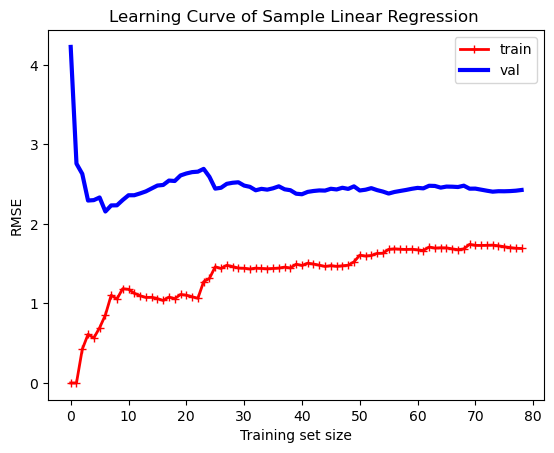

In [789]:
# Implement the book’s code on learning curves on the data he has used.

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)
train_errors, val_errors = [], []

lin_reg = LinearRegression()

for m in range(1, len(X_train)):
    lin_reg.fit(X_train[:m], y_train[:m])
    y_train_predict = lin_reg.predict(X_train[:m])
    y_val_predict = lin_reg.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.title("Learning Curve of Sample Linear Regression ")

Withe Linear regression the model that’s underfitting deserves a bit of explanation. 
First, let’s look at the performance
on the training data: when there are just one or two instances in the training
set, the model can fit them perfectly, which is why the curve starts at zero. But as
new instances are added to the training set, it becomes impossible for the model to fit
the training data perfectly, both because the data is noisy and because it is not linear
at all. So the error on the training data goes up until it reaches a plateau, at which
point adding new instances to the training set doesn’t make the average error much
better or worse. Now let’s look at the performance of the model on the validation
data. When the model is trained on very few training instances, it is incapable of generalizing
properly, which is why the validation error is initially quite big. Then, as the

Text(0.5, 1.0, 'Learning Curve of Sample Polynomial Regression ')

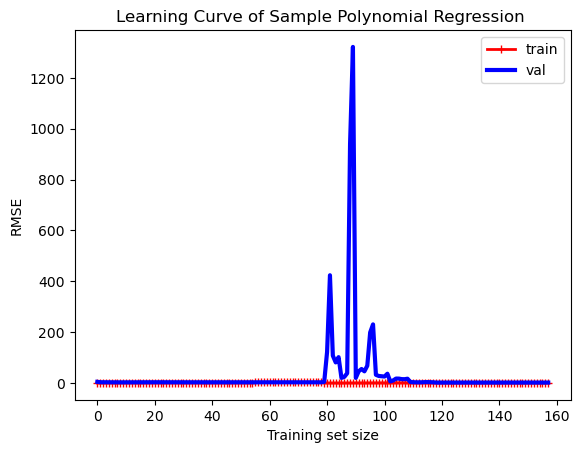

In [790]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

for m in range(1, len(X_train)):
    polynomial_regression.fit(X_train[:m], y_train[:m])
    y_train_predict = polynomial_regression.predict(X_train[:m])
    y_val_predict = polynomial_regression.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.title("Learning Curve of Sample Polynomial Regression ")

These learning curves look a bit like the previous ones, but there are two very important differences:

• The error on the training data is much lower than with the Linear Regression model.       
• There is a gap between the curves. This means that the model performs significantly 
better on the training data than on the validation data, which is the hallmark
of an overfitting model. If you used a much larger training set, however, the
two curves would continue to get closer.

Change the method so that instead of having an incremental training set size going from 1 to the size of X_train, you have a fixed set of training sizes.
For example: 

training_set_sizes = np.linspace(2, len(X_train), len(X_train), dtype='int')

or 

training_set_sizes = [1, 10, 20, 30, 40, 50, 60, 70, 80]

In [791]:
# Method that plots learning curves for a given estimator and training_set_sizes

def plot_learning_curves_size(model, X_train, X_val, y_train, y_val ,training_set_size):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)
    train_errors, val_errors = [], []
    for m in training_set_size:
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(training_set_size,np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(training_set_size,np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")


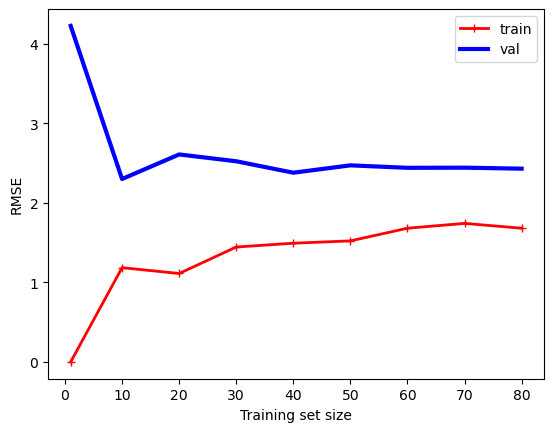

In [792]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

lin_reg = LinearRegression()
training_set_sizes = [1, 10, 20, 30, 40, 50, 60, 70, 80]
plot_learning_curves_size(lin_reg, X_train, X_val, y_train, y_val,training_set_size=training_set_sizes)

## Learning curves for classifiers

Implement a ML problem on a dataset you have already seen in the course. 

Produce a plot of a model which shows signs of underfitting, and one that shows signs of overfitting.

In [793]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(
    estimator,
    X, y,
    title="Learning Curve",
    axes=None,
    ylim=None,
    cv=5,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring=None,
    shuffle=True,
    random_state=42,
    show_points=True):
    
    """
    Trace la learning curve d'un estimateur sklearn.

    Params
    ------
    estimator : modèle sklearn (non fit)
    X, y      : features et cible
    title     : titre du graphique
    axes      : axe matplotlib existant (facultatif). Si None, crée une figure.
    ylim      : tuple (ymin, ymax) pour la limite verticale
    cv        : int ou splitter sklearn (ex. StratifiedKFold)
    n_jobs    : parallélisation pour learning_curve
    train_sizes : fraction(s) ou tailles absolues (array-like)
    scoring   : métrique sklearn (ex: 'accuracy', 'f1', 'neg_mean_squared_error', etc.)
    shuffle   : mélanger avant split (si cv est un int)
    random_state : pour la reproductibilité si shuffle=True
    show_points : affiche les points en plus des courbes

    Returns
    -------
    ax, data : l'axe matplotlib et un dict contenant les arrays calculés
    """
    # appel sklearn
    sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X, y,
        train_sizes=train_sizes,
        cv=cv,
        n_jobs=n_jobs,
        scoring=scoring,
        shuffle=shuffle,
        random_state=random_state,
        return_times=True
    )

    train_mean = train_scores.mean(axis=1)
    train_std  = train_scores.std(axis=1)
    test_mean  = test_scores.mean(axis=1)
    test_std   = test_scores.std(axis=1)

    # figure/axes
    if axes is None:
        fig, ax = plt.subplots(figsize=(7, 4.5))
    else:
        ax = axes

    if ylim is not None:
        ax.set_ylim(*ylim)

    ax.set_title(title)
    ax.set_xlabel("Taille du set d'entraînement")
    ax.set_ylabel(scoring if isinstance(scoring, str) else "Score")

    # zones ± écart-type
    ax.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
    ax.fill_between(sizes, test_mean  - test_std,  test_mean  + test_std,  alpha=0.15)

    # courbes
    ax.plot(sizes, train_mean, label="Train", linewidth=2)
    ax.plot(sizes, test_mean,  label="Validation CV", linewidth=2)

    if show_points:
        ax.plot(sizes, train_mean, "o")
        ax.plot(sizes, test_mean,  "o")

    ax.grid(True, linestyle="--", alpha=0.4)
    ax.legend(loc="best")
    plt.tight_layout()

    data = {
        "train_sizes": sizes,
        "train_scores": train_scores,
        "test_scores": test_scores,
        "fit_times": fit_times,
        "train_mean": train_mean,
        "train_std": train_std,
        "test_mean": test_mean,
        "test_std": test_std,
    }
    return ax, data
 
    


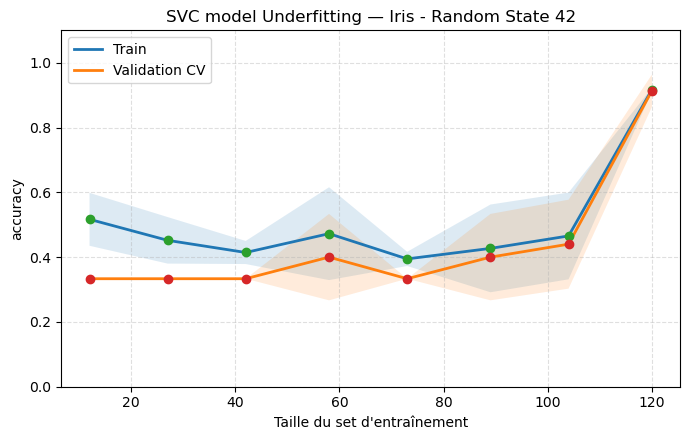

In [794]:
##### exemple 

from sklearn.datasets import load_iris
from sklearn.svm import SVC


iris = datasets.load_iris()

X = iris.data[:,] 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=42)


modelSVC_Under = SVC(kernel="rbf", C=1e-3, gamma=1e-3)
modelSVC_Under.fit(X_train, y_train)
y_predTrainSVR = modelSVC_Under.predict(X_train)
y_predTestSVR = modelSVC_Under.predict(X_test)


cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
ax, data = plot_learning_curve(
    modelSVC_Under, X, y,
    title="SVC model Underfitting — Iris - Random State 42",
    cv=cv,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    scoring="accuracy",
    ylim=(0.0, 1.1)
)   

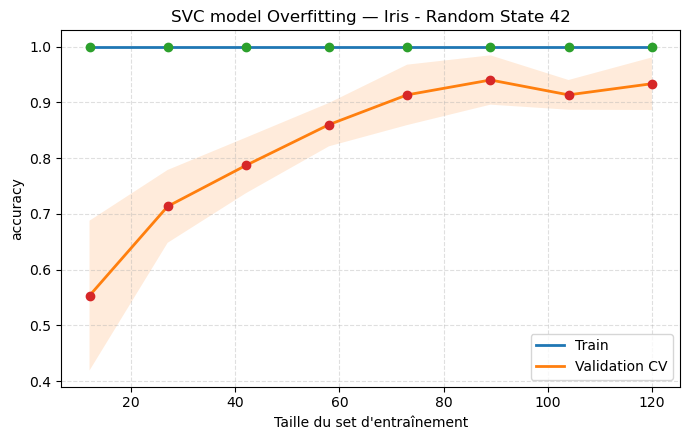

In [795]:
## overfit model

modelSVC_Over = SVC(kernel="rbf", C=1e4, gamma=10.0)
modelSVC_Over.fit(X_train, y_train)
y_predTrainSVR = modelSVC_Over.predict(X_train)
y_predTestSVR = modelSVC_Over.predict(X_test)



ax, data = plot_learning_curve(
    modelSVC_Over, X, y,
    title="SVC model Overfitting — Iris - Random State 42",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    scoring="accuracy",
)  

## Decision trees learning curves

In [828]:
# import the dataset you want
from sklearn.datasets import make_circles

# --- 1) Jeu de données non linéaire + bruit (propice à l'overfit)
X, y = make_circles(n_samples=100, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


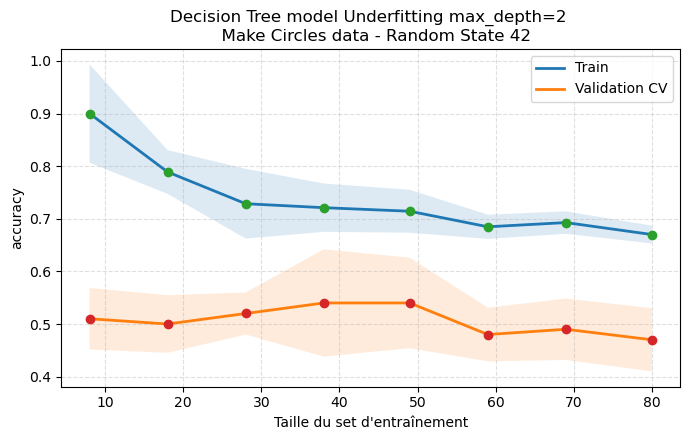

In [829]:
# Underfit model
# Train a decision tree with max_depth=2
dt_under = DecisionTreeClassifier(max_depth=2,random_state=42)

ax, data = plot_learning_curve(
    dt_under, X, y,
    title="Decision Tree model Underfitting max_depth=2 \n  Make Circles data - Random State 42",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    scoring="accuracy",
) 

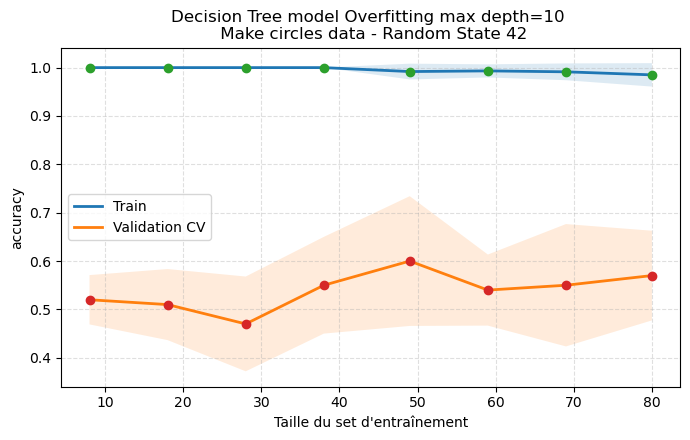

In [830]:
# Overfit model
# Train a decision tree with max_depth=10
dt_over  = DecisionTreeClassifier(max_depth=10, random_state=42)

ax, data = plot_learning_curve(
    dt_over, X, y,
    title="Decision Tree model Overfitting max depth=10 \n Make circles data - Random State 42",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    scoring="accuracy"
)  

## Random forests classifier learning curves

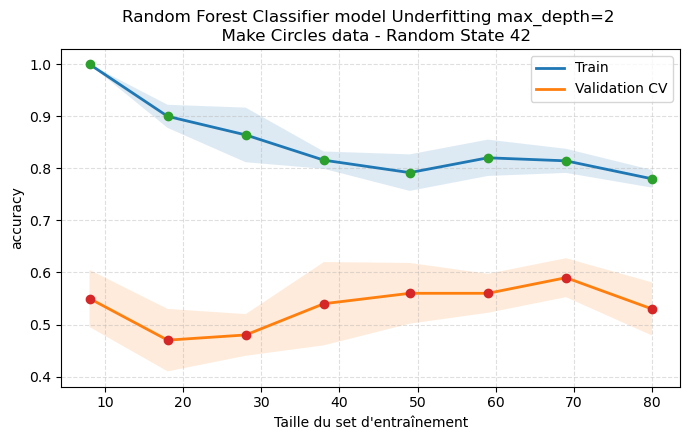

In [831]:
# Underfit model
rf_under = RandomForestClassifier(max_depth=2,random_state=42)

ax, data = plot_learning_curve(
    rf_under, X, y,
    title="Random Forest Classifier model Underfitting max_depth=2 \n  Make Circles data - Random State 42",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    scoring="accuracy",
) 

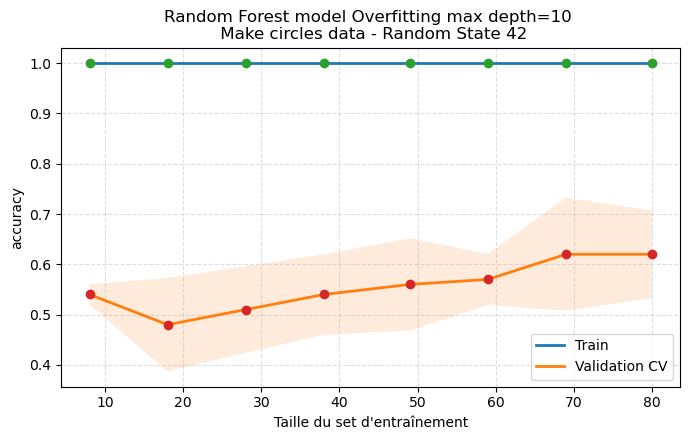

In [832]:
# Overfit model

rf_over  = RandomForestClassifier(max_depth=10, random_state=42)

ax, data = plot_learning_curve(
    rf_over, X, y,
    title="Random Forest model Overfitting max depth=10 \n Make circles data - Random State 42",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    scoring="accuracy"
)  

## SVM

SVM Advantages:

- SVM’s are very good when we have no idea on the data.
- Works well with even unstructured and semi structured data like text, Images and trees.
- The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
- Unlike in neural networks, SVM is not solved for local optima.
- It scales relatively well to high dimensional data.
- SVM models have good generalization in practice, the risk of over-fitting is less in SVM.

SVM Disadvantages:

- Choosing a “good” kernel function is not easy.
- Long training time for large datasets.
- Difficult to understand and interpret the final model, variable weights and individual impact.
- The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

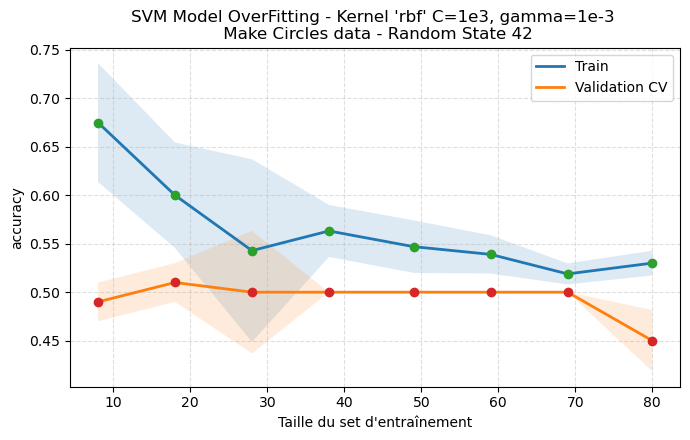

In [833]:
# Underfit model?
from sklearn.svm import SVC
    
svc_under = SVC(kernel="rbf", C=1e-3, gamma=1e-3, random_state=42)

ax, data = plot_learning_curve(
    svc_under, X, y,
    title="SVM Model OverFitting - Kernel 'rbf' C=1e3, gamma=1e-3 \n Make Circles data - Random State 42",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    scoring="accuracy",
) 


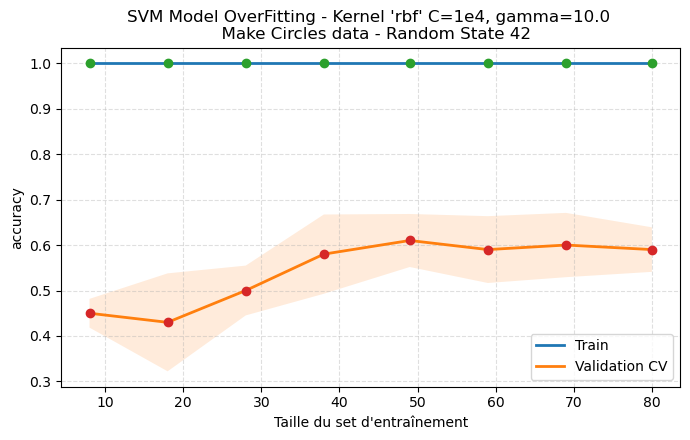

In [834]:
# Overfit model?
# Underfit model
svc_over = SVC(kernel="rbf", C=1e4, gamma=10.0,random_state=42)


ax, data = plot_learning_curve(
    svc_over, X, y,
    title="SVM Model OverFitting - Kernel 'rbf' C=1e4, gamma=10.0 \n  Make Circles data - Random State 42",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    scoring="accuracy",
) 

## Validation curves

Validation curves are a useful tool for improving the performance of a model by addressing issues such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters. They are complementary of GridSearch and make for a very nice visual tool for ypur algorithm optimization. 


In [842]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(
    estimator,
    X, y,
    param_name,
    param_range,
    title="Validation Curve",
    cv=5,
    scoring="accuracy",
    n_jobs=None,
    ylim=None,
    logx=False,
    axes=None,
    show_points=True,
):
    
    """
    Trace une courbe de validation pour un estimateur sklearn.

    Parameters
    ----------
    estimator : estimator sklearn (non fit; peut être un Pipeline)
    X, y      : données
    param_name : str, nom du paramètre à faire varier (ex: 'svc__C' dans un Pipeline)
    param_range : array-like, valeurs testées
    title : str, titre du graphe
    cv : int ou splitter (ex: StratifiedKFold)
    scoring : métrique (ex: 'accuracy', 'f1', 'neg_mean_squared_error', ...)
    n_jobs : parallélisation
    ylim : tuple (ymin, ymax) pour l’axe Y
    logx : bool, met l’axe X en log
    axes : axe matplotlib existant ; si None, crée la figure
    show_points : ajoute des marqueurs sur les courbes

    Returns
    -------
    ax, results_df
    """
    train_scores, test_scores = validation_curve(
        estimator,
        X, y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
        scoring=scoring,
        n_jobs=n_jobs
    )
    train_mean = train_scores.mean(axis=1)
    train_std  = train_scores.std(axis=1)
    test_mean  = test_scores.mean(axis=1)
    test_std   = test_scores.std(axis=1)

    if axes is None:
        fig, ax = plt.subplots(figsize=(7, 4.5))
    else:
        ax = axes

    if ylim is not None:
        ax.set_ylim(*ylim)

    ax.set_title(title)
    ax.set_xlabel(param_name)
    ax.set_ylabel(scoring)
    if logx:
        ax.set_xscale("log")

    ax.fill_between(param_range, train_mean-train_std, train_mean+train_std, alpha=0.15)
    ax.fill_between(param_range, test_mean-test_std,   test_mean+test_std,   alpha=0.15)
    ax.plot(param_range, train_mean, label="Train", linewidth=2)
    ax.plot(param_range, test_mean,  label="Validation CV", linewidth=2)
    if show_points:
        ax.plot(param_range, train_mean, "o")
        ax.plot(param_range, test_mean,  "o")
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.legend(loc="best")
    plt.tight_layout()

    import pandas as pd
    results_df = pd.DataFrame({
        "param_value": param_range,
        "train_mean": train_mean,
        "train_std": train_std,
        "val_mean": test_mean,
        "val_std": test_std
    })
    return ax, results_df
    # create your method to plot your learning curves using the sklearn method validation_curve()
    pass

Plot the validation curves for a chosen algorithm and vary 1 or 2 parameters of your choice.

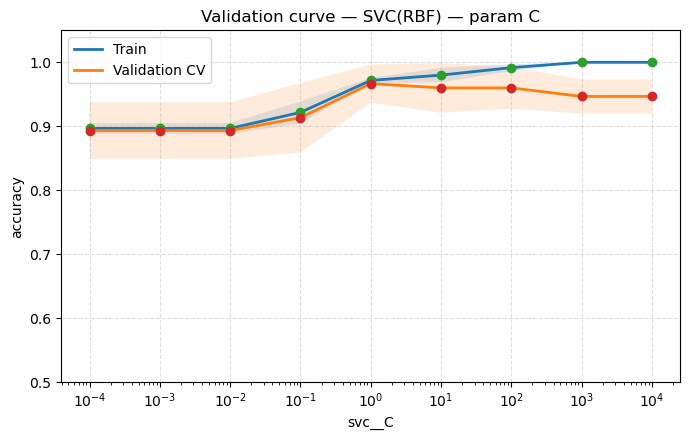

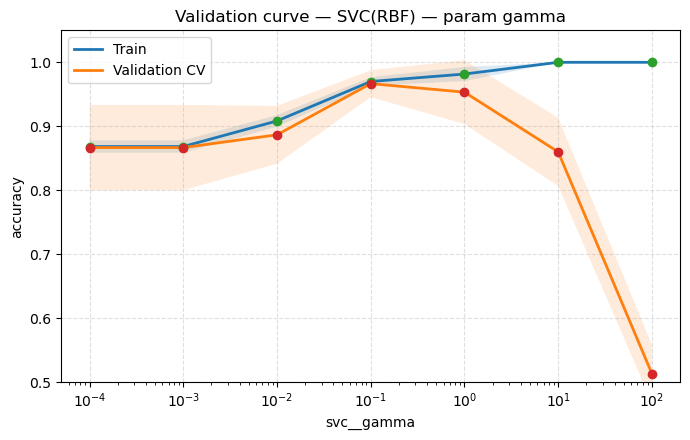

In [844]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X, y = iris.data, iris.target


pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", random_state=42))
])


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=51)

# Courbe pour C
C_range = np.logspace(-4, 4, 9)
ax1, dfC = plot_validation_curve(
    pipe, X, y,
    param_name="svc__C",
    param_range=C_range,
    title="Validation curve — SVC(RBF) — param C",
    cv=cv, scoring="accuracy", n_jobs=-1,
    logx=True, ylim=(0.5, 1.05)
)

# Courbe pour gamma
gamma_range = np.logspace(-4, 2, 7)
ax2, dfG = plot_validation_curve(
    pipe, X, y,
    param_name="svc__gamma",
    param_range=gamma_range,
    title="Validation curve — SVC(RBF) — param gamma",
    cv=cv, scoring="accuracy", n_jobs=-1,
    logx=True, ylim=(0.5, 1.05)
)

Do a GridSearch and see if the most optimal parameter is coherent with what you see on your validation curves

In [847]:
from sklearn.model_selection import validation_curve, GridSearchCV

param_grid = {
    "svc__C": C_range,
    "svc__gamma": gamma_range
}
gs = GridSearchCV(
    pipe, param_grid=param_grid, cv=cv,
    scoring="accuracy", n_jobs=-1, refit=True, return_train_score=True
)
gs.fit(X, y)

print("Best params:", gs.best_params_)
print("Best CV score:", gs.best_score_)

Best params: {'svc__C': np.float64(10.0), 'svc__gamma': np.float64(0.01)}
Best CV score: 0.9733333333333334


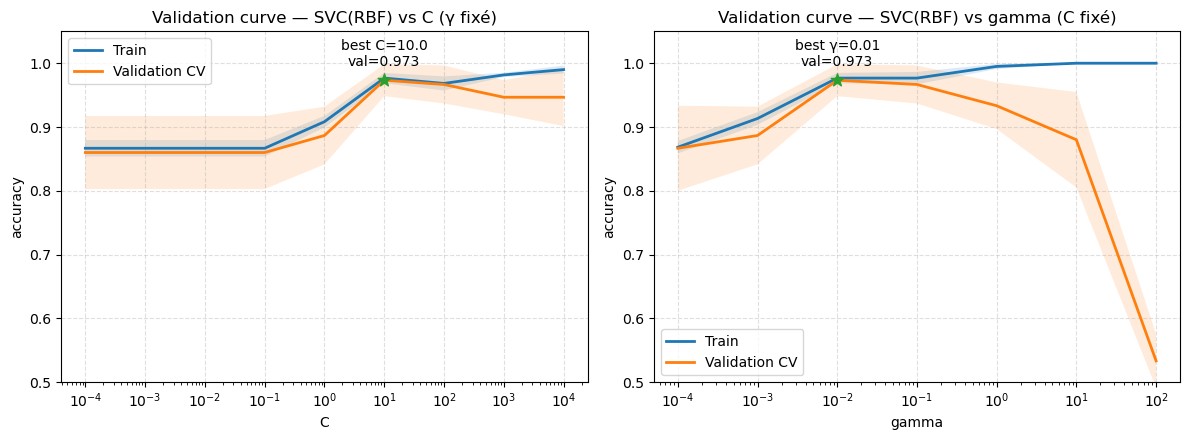

In [848]:
from sklearn.base import clone

best_C = gs.best_params_["svc__C"]
best_gamma = gs.best_params_["svc__gamma"]


# --- 1) Courbe pour C (on fige gamma = best_gamma)
est_C = clone(pipe).set_params(svc__gamma=best_gamma)
train_scores_C, test_scores_C = validation_curve(
    est_C, X, y, param_name="svc__C", param_range=C_range,
    cv=cv, scoring="accuracy", n_jobs=-1
)
train_mean_C = train_scores_C.mean(axis=1)
test_mean_C  = test_scores_C.mean(axis=1)

# --- 2) Courbe pour gamma (on fige C = best_C)
est_G = clone(pipe).set_params(svc__C=best_C)
train_scores_G, test_scores_G = validation_curve(
    est_G, X, y, param_name="svc__gamma", param_range=gamma_range,
    cv=cv, scoring="accuracy", n_jobs=-1
)
train_mean_G = train_scores_G.mean(axis=1)
test_mean_G  = test_scores_G.mean(axis=1)

# --- 3) Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))

# ---- Plot C
axes[0].set_title("Validation curve — SVC(RBF) vs C (γ fixé)")
axes[0].set_xlabel("C"); axes[0].set_ylabel("accuracy")
axes[0].set_xscale("log"); axes[0].set_ylim(0.5, 1.05)
axes[0].fill_between(C_range, train_mean_C-train_scores_C.std(axis=1),
                     train_mean_C+train_scores_C.std(axis=1), alpha=0.15)
axes[0].fill_between(C_range, test_mean_C-test_scores_C.std(axis=1),
                     test_mean_C+test_scores_C.std(axis=1),  alpha=0.15)
axes[0].plot(C_range, train_mean_C, label="Train", linewidth=2)
axes[0].plot(C_range, test_mean_C,  label="Validation CV", linewidth=2)
# point optimal
ixC = np.where(np.isclose(C_range, best_C))[0][0]
axes[0].scatter([best_C], [test_mean_C[ixC]], s=90, marker="*", zorder=5)
axes[0].annotate(f"best C={best_C}\nval={test_mean_C[ixC]:.3f}",
                 (best_C, test_mean_C[ixC]),
                 textcoords="offset points", xytext=(0,10), ha="center")
axes[0].legend(); axes[0].grid(True, ls="--", alpha=0.4)

# ---- Plot gamma
axes[1].set_title("Validation curve — SVC(RBF) vs gamma (C fixé)")
axes[1].set_xlabel("gamma"); axes[1].set_ylabel("accuracy")
axes[1].set_xscale("log"); axes[1].set_ylim(0.5, 1.05)
axes[1].fill_between(gamma_range, train_mean_G-train_scores_G.std(axis=1),
                     train_mean_G+train_scores_G.std(axis=1), alpha=0.15)
axes[1].fill_between(gamma_range, test_mean_G-test_scores_G.std(axis=1),
                     test_mean_G+test_scores_G.std(axis=1),  alpha=0.15)
axes[1].plot(gamma_range, train_mean_G, label="Train", linewidth=2)
axes[1].plot(gamma_range, test_mean_G,  label="Validation CV", linewidth=2)
# point optimal
ixG = np.where(np.isclose(gamma_range, best_gamma))[0][0]
axes[1].scatter([best_gamma], [test_mean_G[ixG]], s=90, marker="*", zorder=5)
axes[1].annotate(f"best γ={best_gamma}\nval={test_mean_G[ixG]:.3f}",
                 (best_gamma, test_mean_G[ixG]),
                 textcoords="offset points", xytext=(0,10), ha="center")
axes[1].legend(); axes[1].grid(True, ls="--", alpha=0.4)

plt.tight_layout(); plt.show()

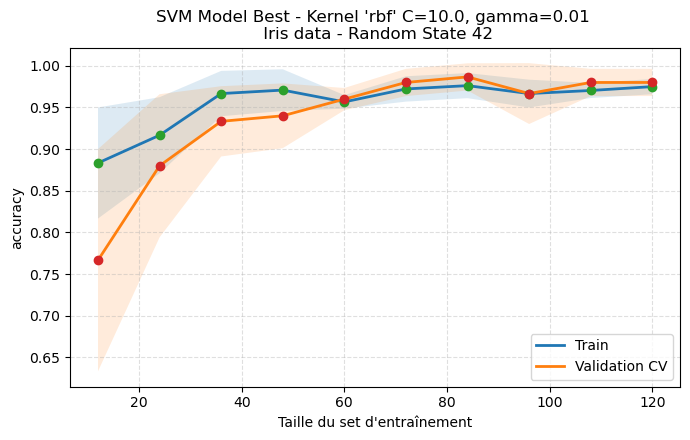

In [855]:
### plot learning curve avec meilleur paramètre trouvé 

svc_best = SVC(kernel="rbf", C=best_C, gamma=best_gamma, random_state=42)

ax, data = plot_learning_curve(
    svc_best, X, y,
    title=f"SVM Model Best - Kernel 'rbf' C={best_C}, gamma={best_gamma} \n Iris data - Random State 42",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy",
) 


On voit bien qu'à partir d'un jeu d'entrainment de 60 échantillons, nous avons voyons que le modèle est plutôt performant. 
Les courbes d'apprentissage sont supérieures à 95% d'accuracy et les courbes du Train et du Test sont proches.
Il y a encore quelques petites variations mais cela reste assez faible.